# Equity Research

An equity research analyst is a professional who evaluates public companies and provides recommendations on whether to buy, sell, or hold their stocks.

**Buy-Side Analysts** work for institutional investors such as hedge funds and asset managers. Their primary objective is to identify profitable investment opportunities that align with their firm’s strategy. They conduct in-depth research, build financial models, and analyze market trends to support portfolio managers in making buy, hold, or sell decisions. Unlike sell-side analysts, their research is proprietary, used internally to maximize returns rather than being published for external clients.

**Sell-side Analysts** work for brokerage firms and investment banks, where they provide research reports, stock recommendations, and earnings forecasts to institutional and retail investors. Their role involves analyzing companies, forecasting earnings, and publishing reports with investment ratings (e.g., buy, hold, or sell). These insights help institutional and retail investors make informed decisions and also support their firm’s trading desks and investment banking activities. Unlike buy-side analysts, sell-side analysts focus on generating market insights and often engage with clients and media to discuss their findings.

Today we are going to put ourselves in the shoes of a **Sell-Side** Equity Analyst. 

We are going to look at some of the tools we can use in Python to assist in building an equity research report for publication.
We are not so much focussed on the process of formulating the analysis such as building a DCF.
Rather we want to learn how to use the tools that can automate some of the work we may do as an analyst.

**Step 1** will be to create a few handy functions

**Step 2** will be to pull in some live data from an application programming interface (API)

**Step 3** will be to scrape data from a website

**Step 4** will be to learn how to apply some Python functionality to this data, including the functions we have created and creating some graphs

**Step 5** will be to create a pdf file and import a csv file into Python

# Create some handy functions
Here we are going to create some functions that we can call to do some calculations

In [1]:
# Function to calculate the P/E ratio of a stock
def calculate_pe_ratio(price, earnings):
    return price / earnings

In [2]:
# Function to calculate the dividend yield of a stock
def calculate_dividend_yield(dividend, price):
    return dividend / price

In [3]:
# Function to calculate the earnings per share of a stock
def calculate_eps(net_income, shares_outstanding):
    return net_income / shares_outstanding

In [4]:
# Function to calculate ROA of a stock
def calculate_roa(net_income, total_assets):
    return net_income / total_assets

# Application Programming Interfaces (APIs)

### Introducing APIs
 - An Application Programming Interface (API) is the means by which a computer program can interact with a service over the internet. 

 ![Slide Image](images/API%20Diagram.jpg)
 

### Why use APIs?

- While we can use the browser (User Interface) in the simplest instance, implementing APIs into our program has many benefits:
  - **Streamlining:** Sourcing data from websites, downloading the data in .csv format, and reading into our model requires a great deal of human labour (time costly and susceptible to human error). Accessing the data through an API directly is a much more streamline process.
  - **Replicability:** If we write the API calls into our program dynamically, the model can update with new data in a single click. The source of this data is always known.
  - **Customisability:** The data inputs can be altered to suit updated needs

### Requests Python Library

- “Requests” is a python library that enables interaction with REST APIs
- The following are the main commands (“methods”) that are issued to a REST API:
  - GET
  - POST
  - PUT
  - DELETE
- GET is the method we are going to be interested in since it enables us to retrieve data from a service
- To install requests into your python environment, type the following at the terminal

  - pip install requests

![Slide Image](images/Requests.jpg)

### Examples of APIs

#### Weather API
Open Meteo is a free and open-source weather data API that provides access to real-time and historical weather data for locations around the world. It offers a range of weather data, including temperature, humidity, wind speed, and precipitation. This code uses a user input for latitude and longitude and uses a GET request to retrieve the weather data.

In [ ]:
# First we will download all required packages
# %pip is a Jupyter magic command that allows us to run pip commands in a Jupyter notebook
# We will use it to install the required packages from the requirements.txt file

%pip install -r requirements.txt

In [5]:
import requests
import pandas as pd

# Ask user for latitude and longitude (e.g., Sydney is -33.891228, 151.19585)
latitude = input("Enter latitude: ")
longitude = input("Enter longitude: ")

# We construct a URL that is specific to the latitude and longitude the user inputted.
url = f'https://api.open-meteo.com/v1/forecast?latitude={latitude}&longitude={longitude}&current_weather=true&hourly=temperature_2m,relativehumidity_2m,windspeed_10m'
response = requests.get(url)    # We can then query this URL using a GET request
data = response.json()          # Format the response to json

current_weather = data['current_weather']
print(f'Weather information at {latitude},{longitude}')
pd.DataFrame.from_dict(current_weather, orient='index', columns=['values'])

Weather information at -33.891228,151.19585


,values
time,2025-02-20T08:00
interval,900
temperature,20.6
windspeed,18.1
winddirection,159
is_day,1
weathercode,3


#### Joke of the Day API
The "Official Joke API" is a free, public REST API that provides random jokes in JSON format. You can use it to retrieve jokes programmatically.

In [ ]:
url = "https://official-joke-api.appspot.com/random_joke"
response = requests.get(url)

joke = response.json()
print(f"{joke['setup']} \n{joke['punchline']}")

How do the trees get on the internet? 
They log on.


### yfinance API
yfinance is a Python library that allows you to download financial data from Yahoo Finance. It provides a simple and convenient way to access historical stock prices, dividend data, and other financial data for publicly traded companies. With yfinance, you can easily download data for multiple stocks at once and perform analysis on the data using popular Python libraries like Pandas and Matplotlib.

We will start by using our previously defined functions to produce some ratios and indicators for the stock.

In [12]:
import yfinance as yf

# Take user input for ticker
TICKER = input('Enter a stock ticker (e.g. BHP.AX): ').upper()

try:
    # Get stock information
    stock = yf.Ticker(TICKER)
    stock_prices = stock.history(period="10y")
    stock_info = stock.info
    stock_financials = stock.financials
    stock_balance_sheet = stock.balance_sheet

    # Extract relevant information
    last_price = stock_prices['Close'].iloc[-1]
    earnings = stock_financials.loc["Net Income"].iloc[0]
    dividend = stock_info['lastDividendValue']
    shares_outstanding = stock_info['sharesOutstanding']
    total_assets = (stock_balance_sheet.loc["Total Assets"].iloc[0] + stock_balance_sheet.loc["Total Assets"].iloc[1]) / 2

    dividend_yield = calculate_dividend_yield(dividend, last_price) * 100
    eps = calculate_eps(earnings, shares_outstanding)
    pe_ratio = calculate_pe_ratio(last_price, eps)
    roa = calculate_roa(earnings, total_assets) * 100

except Exception as e:
    print(f"Error: {e}")

print(f"Chosen Stock: {TICKER} \nLast Share Price: {last_price:.2f} \nPE Ratio: {pe_ratio:.2f} \nDividend Yield: {dividend_yield:.2f}% \nEPS: {eps:.2f} \nROA: {roa:.2f}%")


Chosen Stock: BHP.AX 
Last Share Price: 40.80 
PE Ratio: 26.20 
Dividend Yield: 2.72% 
EPS: 1.56 
ROA: 7.76%


We can convert this code into a function which will allow us to run it on any stock.

In [19]:
def calculate_ratios(ticker):
    import yfinance as yf
    stock_prices = pd.DataFrame()
    stock_info = {}
    stock_financials = pd.DataFrame()
    stock_balance_sheet = pd.DataFrame()
    try:
        # Get stock information
        stock = yf.Ticker(ticker)
        stock_prices = stock.history(period="10y")
        stock_info = stock.info
        stock_financials = stock.financials
        stock_balance_sheet = stock.balance_sheet

        # Extract relevant information
        if not stock_prices.empty():
            last_price = stock_prices['Close'].iloc[-1]
        if "Net Income" in stock_financials.columns():
            earnings = stock_financials.loc["Net Income"].iloc[0]
        if "lastDividendValue" in stock_info.keys():
            dividend = stock_info['lastDividendValue']
        if "sharesOutstanding" in stock_info.keys():
            shares_outstanding = stock_info['sharesOutstanding']
        if "Total Assets" in stock_balance_sheet.index():
            total_assets = (stock_balance_sheet.loc["Total Assets"].iloc[0] + stock_balance_sheet.loc["Total Assets"].iloc[1]) / 2
        
        print(f"Chosen Stock: {TICKER}")
        if last_price:
            print(f"Last Share Price: {last_price:.2f}")
            if dividend:
                dividend_yield = calculate_dividend_yield(dividend, last_price) * 100
                print(f"Dividend Yield: {dividend_yield:.2f}%")
        if earnings and shares_outstanding:
            eps = calculate_eps(earnings, shares_outstanding)
            print(f"EPS: {eps:.2f}")
            if last_price:
                pe_ratio = calculate_pe_ratio(last_price, eps)
                print(f"PE Ratio: {pe_ratio:.2f}")
        if earnings and total_assets:
            roa = calculate_roa(earnings, total_assets) * 100
            print(f"ROA: {roa:.2f}%")

    except Exception as e:
        print(f"Error: {e}")


Now we will use the matplotlib package to graph the share price of our chosen stock.

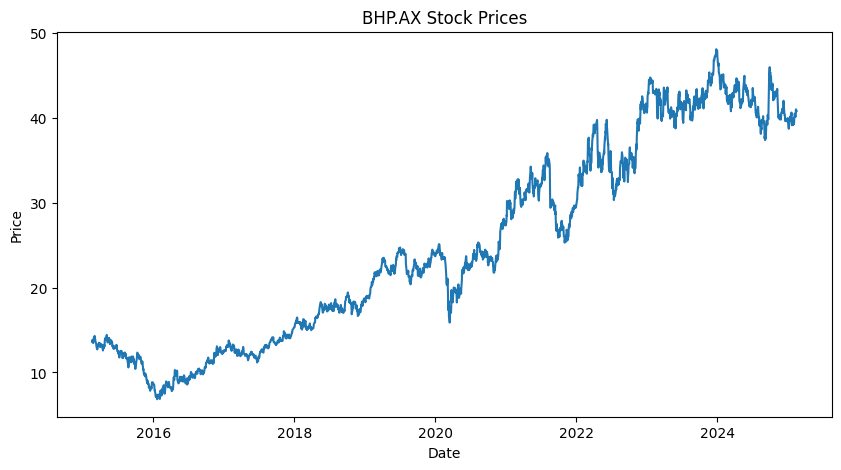

In [13]:
import matplotlib.pyplot as plt

# Plot the stock prices
plt.figure(figsize=(10, 5))
plt.plot(stock_prices['Close'])
plt.title(f"{TICKER} Stock Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

## Pandas read_html() function

Pandas provides a `read_html()` function that allows you to extract tables from HTML web pages and convert them into Pandas DataFrames. This function is particularly useful for web scraping tasks where you need to extract data from HTML tables on a web page. The `read_html()` function can automatically detect and parse HTML tables from a web page and return them as a list of DataFrames. You can then manipulate the DataFrames using Pandas to perform further analysis or export the data to other formats.

In [12]:
# use the read_html() function from pandas to scrape some data from a website that is relevant to the stock

# We will use read_html() to scrape the constituent stocks of the ASX200 index from Wikipedia
asx200 = "https://en.wikipedia.org/wiki/S%26P/ASX_200"
data = pd.read_html(asx200)

for table in data:
    if "Company" in table.columns:
        asx200_constituents = table
        break

asx200_constituents = asx200_constituents["Company"]
asx200_constituents.head()

0          a2 Milk Company
1                    Adbri
2    Abacus Property Group
3               AGL Energy
4         Auckland Airport
Name: Company, dtype: object

In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Create a text input widget
stock_code_input = widgets.Text(
    value='',
    placeholder='Stock code',
    description='Stock code:',
    disabled=False
)

# Create a button widget
submit_button = widgets.Button(
    description='Submit',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='check'
)

# Create an output widget
output = widgets.Output()

# Define the function to handle button click
def on_button_click(b):
    with output:
        output.clear_output()
        stock_code = stock_code_input.value
        print(f'Entered Stock Code: {stock_code}')

        calculate_ratios(stock_code_input.value)

# Attach the function to the button click event
submit_button.on_click(on_button_click)

# Display the widgets
display(stock_code_input, submit_button, output)

Text(value='', description='Stock code:', placeholder='Stock code')

Button(description='Submit', icon='check', style=ButtonStyle(), tooltip='Click me')

Output()

In [ ]:
# code to read commentary from a text file into a string for later inclusion in the analyst report
# also read from a csv file into a pandas dataframe (using pandas.read_csv(file_path)) for later inclusion in the analyst report

In [ ]:
# show the students how to create a pdf file

from fpdf import FPDF

# Create instance of FPDF class
pdf = FPDF()

# Add a page
pdf.add_page()

# Set font
pdf.set_font("Arial", size=12)

# Add a cell
pdf.cell(200, 10, txt="Welcome to Python PDF creation!", ln=True, align='C')

# Save the PDF with name .pdf
pdf.output("simple_demo.pdf")

print("PDF created successfully!")

In [17]:
# get DCF output from an excel file

import pandas as pd

# Read the excel file
df = pd.read_excel('DCF_test.xlsx', sheet_name="Sheet1", usecols='A:L', skiprows=0, nrows=3)

print (df)

              Year         2025         2026         2027         2028  \
0         Cashflow  2208.234503  8409.837696  3066.882847  2526.980787   
1  Discount factor     0.952381     0.907029     0.863838     0.822702   

          2029         2030         2031         2032        2033  \
0  5670.492956  6511.520390  3202.663033  1241.044536  718.228398   
1     0.783526     0.746215     0.710681     0.676839    0.644609   

          2034         2035  
0  4387.708928  7484.910830  
1     0.613913     0.584679  
